In [10]:
import numpy as np 

In [11]:
def linear_regression(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2) #استخدام التباين (بدون جذر)
    m = numerator / denominator
    b = y_mean - m * x_mean
    return np.array([m,b])

# --- البيانات الأصلية ---
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1, 2, 3, 4, 5, 5.8, 7.1])  # بيانات مع بعض التباين

coefficients = linear_regression(x,y)
print(f"معامل الانحدار (m) :{coefficients[0]}")
print(f"التقاطع (b):{coefficients[1]}")


معامل الانحدار (m) :0.9964285714285713
التقاطع (b):0.0


In [12]:
x_new = np.array([6,7,8,9,10])

m , b = coefficients 

#prediction 
y_pred = m * x + b 
#Show Results 
print("Predictions:")

for xi , yi in zip(x_new,y_pred):
    print(f"x={xi} -> y_predicted = {yi}")


Predictions:
x=6 -> y_predicted = 0.9964285714285713
x=7 -> y_predicted = 1.9928571428571427
x=8 -> y_predicted = 2.989285714285714
x=9 -> y_predicted = 3.9857142857142853
x=10 -> y_predicted = 4.982142857142857


In [13]:
import matplotlib.pyplot as plt

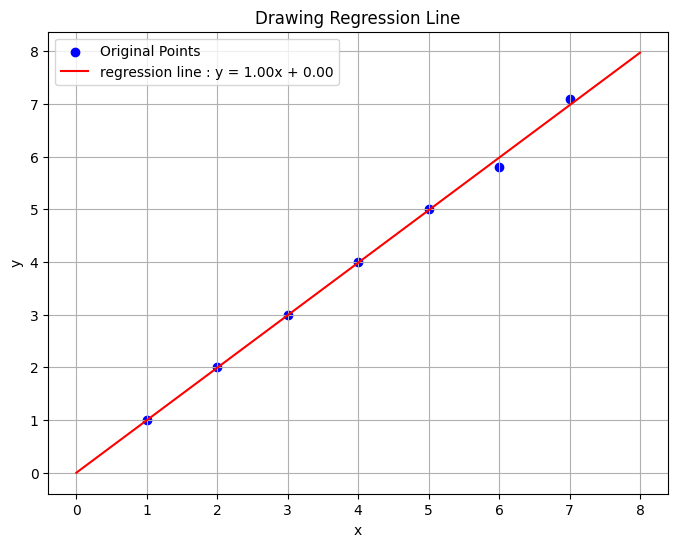

In [14]:
# رسم البيانات وخط الانحدار
plt.figure(figsize=(8, 6))

# رسم النقاط الأصلية
plt.scatter(x, y, color='blue', label='Original Points')

# إنشاء خط الانحدار
x_line = np.linspace(min(x) - 1, max(x) + 1, 100)  # مجموعة قيم x لرسم الخط
y_line = m * x_line + b  # حساب قيم y المناظرة للخط

# رسم الخط
plt.plot(x_line, y_line, color='red', label=f'regression line : y = {m:.2f}x + {b:.2f}')

# تخصيص الرسم
plt.title('Drawing Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
# حساب خطأ التربيع المتوسط
mse = mean_squared_error(y, y_pred)
print(f"{mse}")

0.006887755102040789


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#to convert x : 1D vector to 2D 
X = x.reshape(-1, 1)

# إنشاء النموذج وتدريبه
model = LinearRegression()
model.fit(X, y)

# الحصول على المعاملات
m_sk = model.coef_[0]
b_sk = model.intercept_

# التنبؤات من scikit-learn
y_pred_sk = model.predict(X)

# حساب MSE
mse_sk = mean_squared_error(y, y_pred_sk)
print(m_sk)
print(b_sk)
print(mse_sk)

0.9964285714285713
0.0
0.006887755102040789


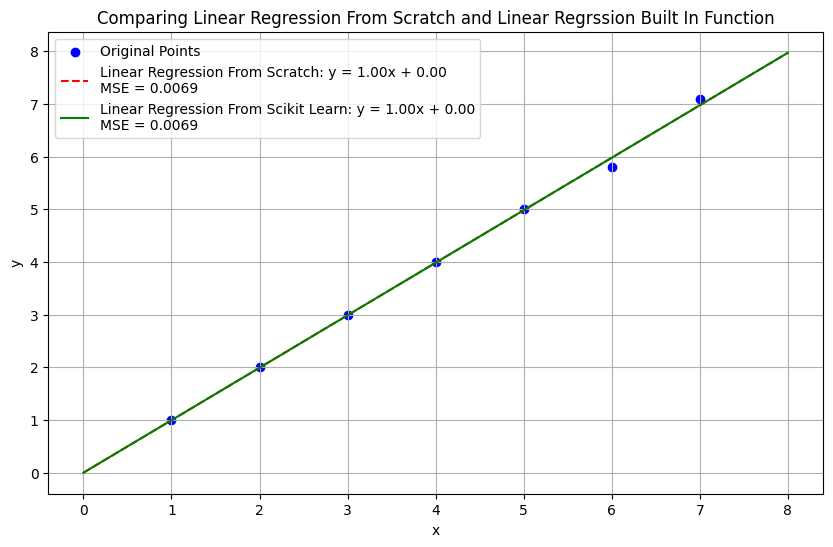

In [19]:
plt.figure(figsize=(10, 6))

# رسم النقاط الأصلية
plt.scatter(x, y, color='blue', label='Original Points')

# إنشاء محور السينات للرسم
x_line = np.linspace(min(x) - 1, max(x) + 1, 100)

plt.plot(x_line, m * x_line + b, color='red', linestyle='--', label=f'Linear Regression From Scratch: y = {m:.2f}x + {b:.2f}\nMSE = {mse:.4f}')

plt.plot(x_line, m_sk * x_line + b_sk, color='green', linestyle='-', label=f'Linear Regression From Scikit Learn: y = {m_sk:.2f}x + {b_sk:.2f}\nMSE = {mse_sk:.4f}')

# تخصيص الرسم
plt.title('Comparing Linear Regression From Scratch and Linear Regrssion Built In Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
print("معاملات من الصفر:")
print(f"m = {m:.4f}, b = {b:.4f}, MSE = {mse:.4f}")

print("\nمعاملات من scikit-learn:")
print(f"m = {m_sk:.4f}, b = {b_sk:.4f}, MSE = {mse_sk:.4f}")

معاملات من الصفر:
m = 0.9964, b = 0.0000, MSE = 0.0069

معاملات من scikit-learn:
m = 0.9964, b = 0.0000, MSE = 0.0069


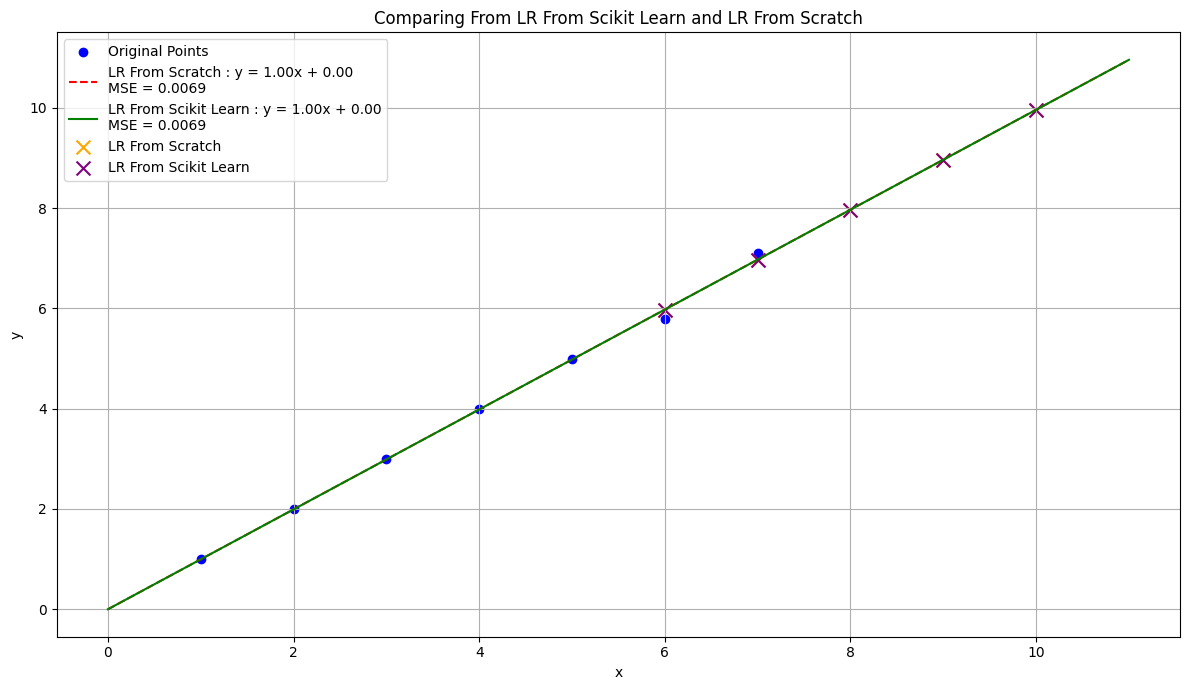

In [21]:
#التنبؤ على نقاط جديدة
x_new = np.array([6, 7, 8, 9, 10])
y_new_pred_our = m * x_new + b 
y_new_pred_sk = model.predict(x_new.reshape(-1, 1))  

# --- رسم النتائج ---
plt.figure(figsize=(12, 7))

# رسم النقاط الأصلية
plt.scatter(x, y, color='blue', label='Original Points')

#min(x) = 1 → min(x) - 1 = 0
#max(x_new) = 10 → max(x_new) + 1 = 11
#min(x) أقل قيمة في المصفوفة - 1 لتبدأ من الصفر
#max(x_new) أكبر قيمة في مصفوفة قيم التنبؤ + 1 

x_line = np.linspace(min(x) - 1, max(x_new) + 1, 100)

plt.plot(x_line, m * x_line + b, color='red', linestyle='--',
         label=f'LR From Scratch : y = {m:.2f}x + {b:.2f}\nMSE = {mse:.4f}')

plt.plot(x_line, m_sk * x_line + b_sk, color='green', linestyle='-',
         label=f'LR From Scikit Learn : y = {m_sk:.2f}x + {b_sk:.2f}\nMSE = {mse_sk:.4f}')

plt.scatter(x_new, y_new_pred_our, color='orange', marker='x', s=100, label='LR From Scratch')
plt.scatter(x_new, y_new_pred_sk, color='purple', marker='x', s=100, label='LR From Scikit Learn')

# إضافة توضيحات
plt.title('Comparing From LR From Scikit Learn and LR From Scratch')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



معامل الانحدار (m_gd): 0.0000
التقاطع (b_gd): 0.0000
MSE :0.006887755102040789


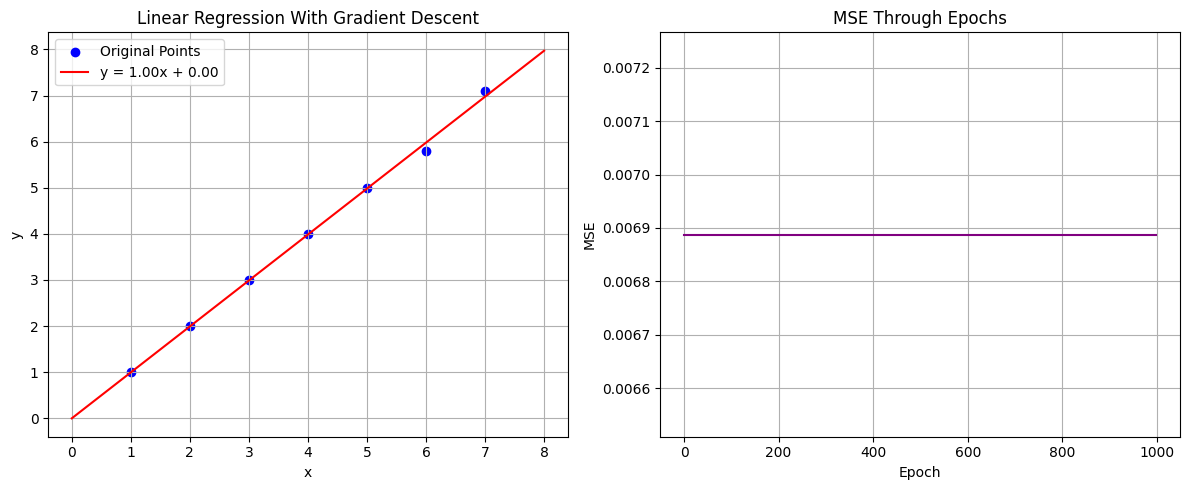

In [27]:
#Implementation For Linear Regression Using Gradient Descent 
# تهيئة المعاملات
m_gd = 0.0
b_gd = 0.0

# Hyperparameters
learning_rate = 0.01
n_epochs = 1000

# عدد النقاط
n = len(x)

# قائمة لحفظ قيم الخطأ
loss_history = []

# Gradient Descent
for epoch in range(n_epochs):
    # التوقعات الحالية
    y_pred_gd = m * x + b
    
    # حساب الخطأ ومتوسط مربع الخطأ (MSE)
    error = y - y_pred_gd
    mse_gd = np.mean(error**2)
    loss_history.append(mse_gd)
    
    # حساب التدرج
    gradient_m = (-2/n) * np.dot(x, error)
    gradient_b = (-2/n) * np.sum(error)
    
    # تحديث المعاملات
    m_gd -= learning_rate * gradient_m
    b_gd -= learning_rate * gradient_b

print(f"معامل الانحدار (m_gd): {m_gd:.4f}")
print(f"التقاطع (b_gd): {b_gd:.4f}")
print(f"MSE :{mse_gd}")
# رسم خط الانحدار
plt.figure(figsize=(12, 5))

# الرسم 1: خط الانحدار
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Original Points')
x_line = np.linspace(min(x)-1, max(x)+1, 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color='red', label=f'y = {m:.2f}x + {b:.2f}')
plt.title('Linear Regression With Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# الرسم 2: منحنى الخطأ
plt.subplot(1, 2, 2)
plt.plot(loss_history, color='purple')
plt.title('MSE Through Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
#we can improve this function using mini batch to make mse nearest to zero 